<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [4]:
import requests

# URL del archivo a descargar
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'

# Realizar la solicitud GET para descargar el archivo
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Guardar el contenido en un archivo
    with open('m4_survey_data.sqlite', 'wb') as file:
        file.write(response.content)
    print('Archivo descargado exitosamente.')
else:
    print('Error al descargar el archivo:', response.status_code)

Archivo descargado exitosamente.


Connect to the database.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [14]:
import pandas as pd

## Demo: How to run an sql query


In [15]:
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [16]:
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [17]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [18]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


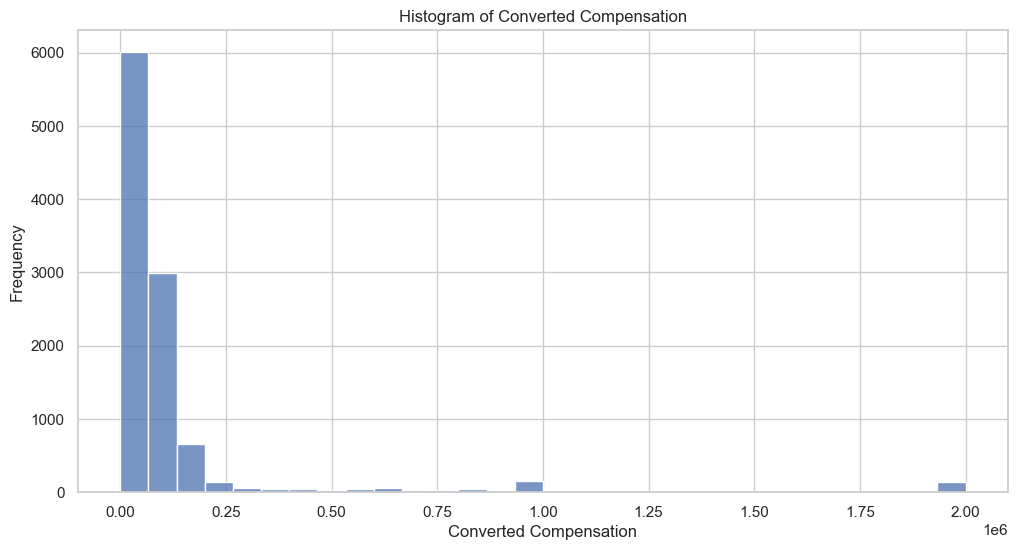

In [19]:
QUERY = """
SELECT ConvertedComp
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(df['ConvertedComp'].dropna(), bins=30, kde=False)  # Ajusta el número de bins si es necesario

plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()


### Box Plots


Plot a box plot of `Age.`


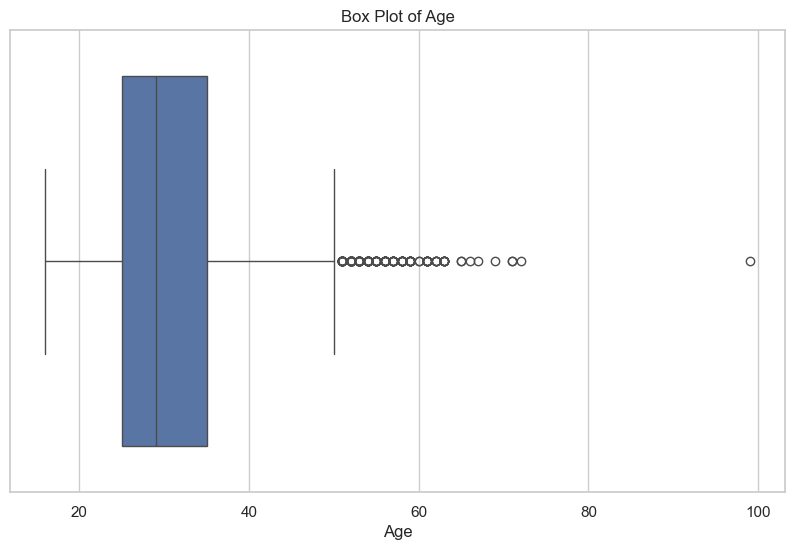

In [20]:
QUERY = """
SELECT Age
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])

plt.title('Box Plot of Age')
plt.xlabel('Age')

plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


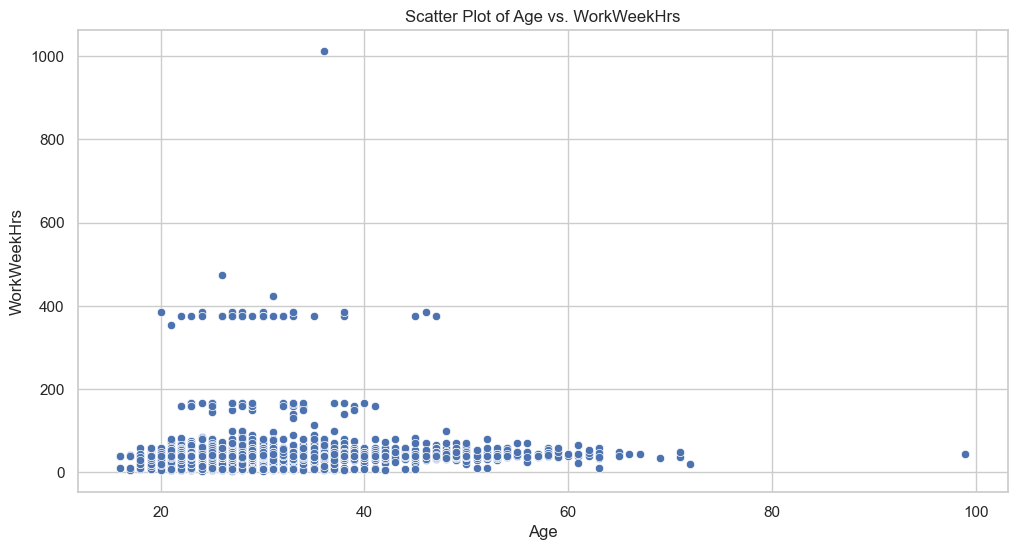

In [21]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='WorkWeekHrs', data=df)

plt.title('Scatter Plot of Age vs. WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')

plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


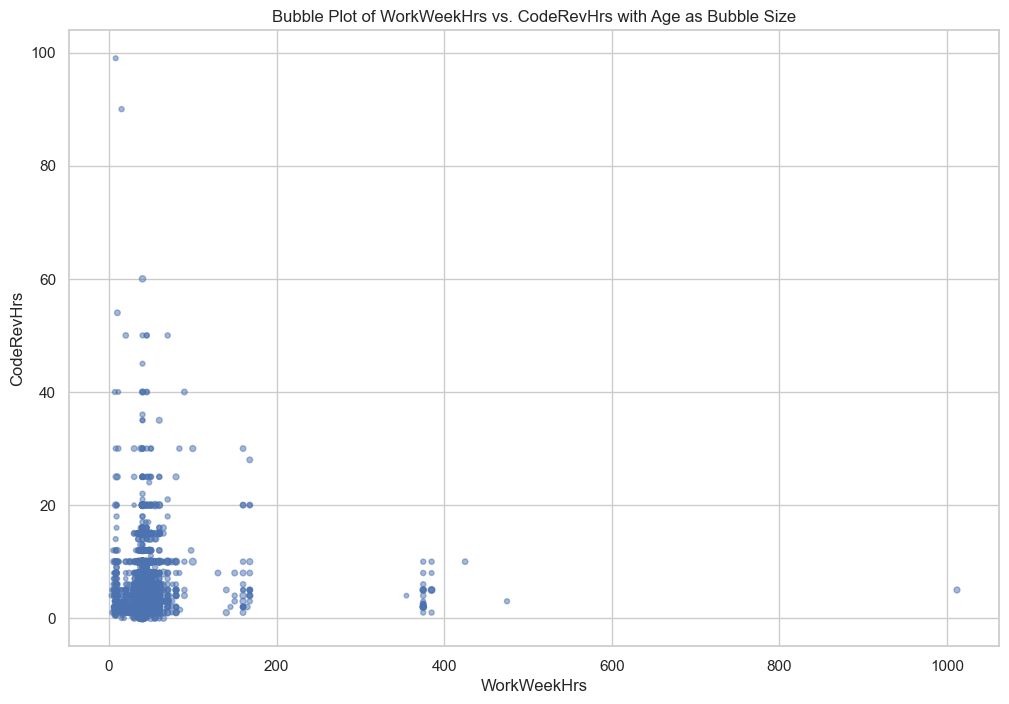

In [23]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 8))
plt.scatter(
    df['WorkWeekHrs'], 
    df['CodeRevHrs'], 
    s=df['Age'] / 2,  # Ajusta el tamaño de las burbujas
    alpha=0.5
)

plt.title('Bubble Plot of WorkWeekHrs vs. CodeRevHrs with Age as Bubble Size')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


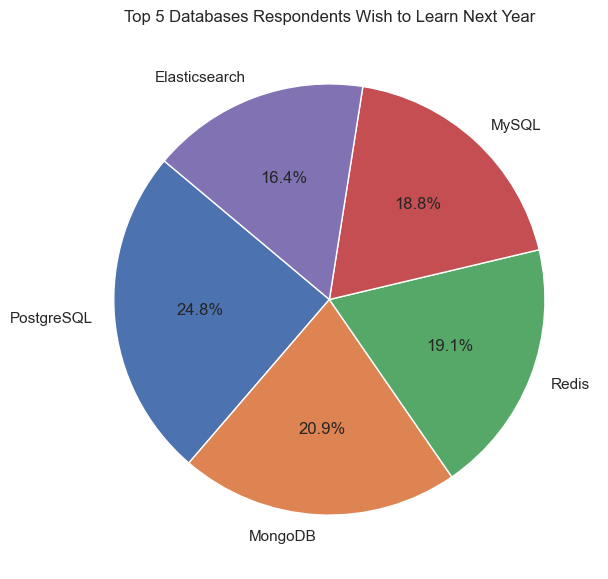

LanguageWorkedWith
JavaScript               8687
HTML/CSS                 7830
SQL                      7106
Bash/Shell/PowerShell    4642
Python                   4542
Java                     4506
C#                       4288
TypeScript               3232
PHP                      2913
C++                      1946
C                        1578
Ruby                     1149
Go                       1114
Other(s):                 840
Kotlin                    751
Swift                     707
VBA                       628
R                         585
Objective-C               518
Scala                     492
Assembly                  437
Rust                      324
Dart                      237
Elixir                    187
Clojure                   164
F#                        158
WebAssembly               133
Erlang                     98
Name: count, dtype: int64


474

In [58]:
QUERY = "SELECT DatabaseDesireNextYear FROM DatabaseDesireNextYear;"
df = pd.read_sql_query(QUERY, conn)

# Contar las ocurrencias de cada base de datos y obtener los 5 más populares
top_databases = df['DatabaseDesireNextYear'].value_counts().nlargest(5)

# Crear el gráfico de pastel
plt.figure(figsize=(10, 7))
plt.pie(top_databases, labels=top_databases.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()

QUERY = "SELECT LanguageWorkedWith FROM LanguageWorkedWith;"
df = pd.read_sql_query(QUERY, conn)

language_counts = df['LanguageWorkedWith'].value_counts()

print(language_counts)

QUERY = """
SELECT * 
FROM DatabaseWorkedWith
ORDER BY Respondent
"""
df = pd.read_sql_query(QUERY,conn)

counts = df.groupby('Respondent').count() #counts: number databases each respondent has worked with

uniques = []

for i in range(len(counts)):
    if counts.values[i] == 1:
        uniques.append(counts.index[i]) #uniques: respondents who have worked with one database

uniq_mysql = 0

for j in range(len(df)):
    if df['Respondent'][j] in uniques:
        if df['DatabaseWorkedWith'][j] == 'MySQL':
            uniq_mysql = uniq_mysql + 1 #uniq_mysql: respondents who have worked with MySQL only

uniq_mysql 

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


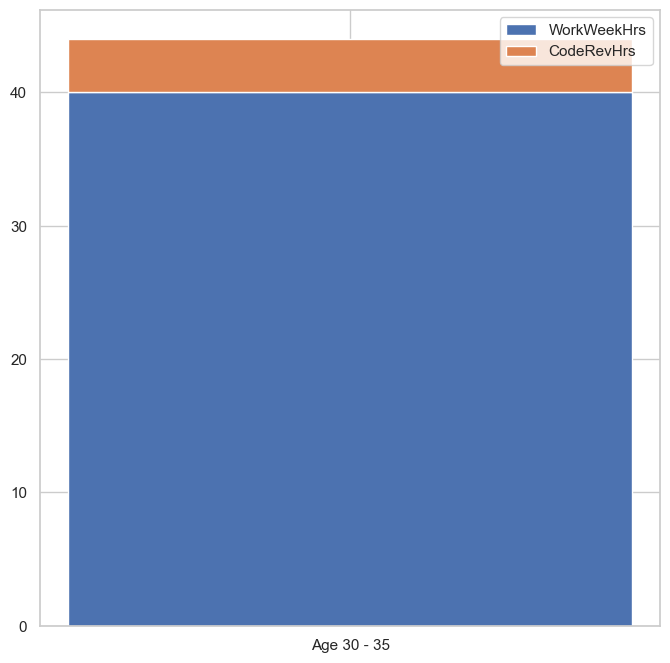

In [59]:

QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35

"""

df = pd.read_sql_query(QUERY,conn)

work_week = df['WorkWeekHrs'].quantile(0.5)
code_rev = df['CodeRevHrs'].quantile(0.5)


plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()

ax.bar('Age 30 - 35', work_week, label='WorkWeekHrs')
ax.bar('Age 30 - 35', code_rev, bottom=work_week, label='CodeRevHrs')
ax.legend()

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


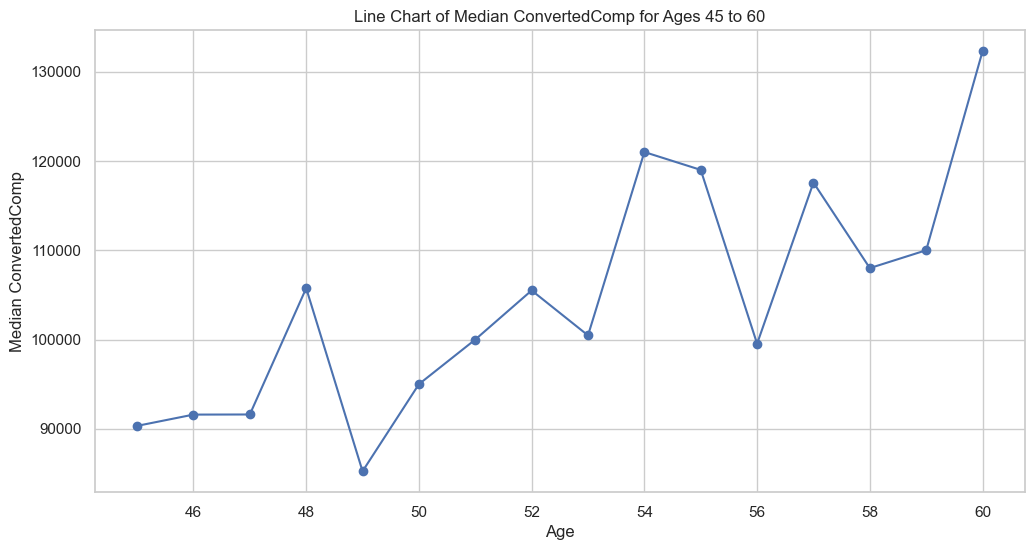

In [30]:
median_converted = df_converted.groupby('Age').median()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(median_converted.index, median_converted['ConvertedComp'], marker='o')

plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.title('Line Chart of Median ConvertedComp for Ages 45 to 60')

plt.show()



### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


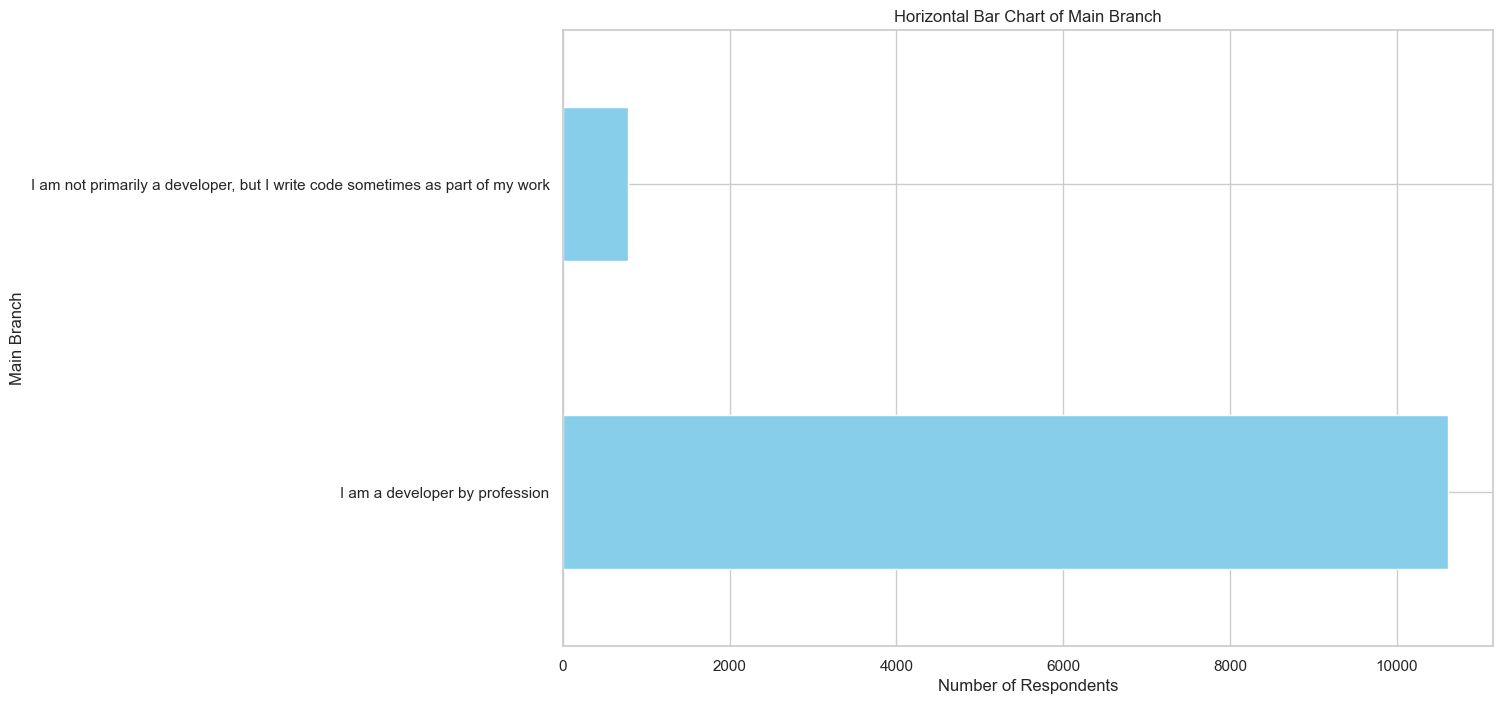

In [31]:
branch_counts = df_mainbranch['MainBranch'].value_counts()

plt.figure(figsize=(12, 8))
branch_counts.plot(kind='barh', color='skyblue')

plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.title('Horizontal Bar Chart of Main Branch')

plt.show()
